In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%pip install autoviz # installing and importing autoviz, another library for automatic data visualization

/kaggle/input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import pandas_profiling
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score 
data = pd.read_csv('../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv')
from sklearn.metrics import roc_curve, roc_auc_score


In [18]:
print(data.columns)
data.head(10)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [19]:
report = pandas_profiling.ProfileReport(data)


In [20]:
#Displays all details of descriptive analysis on data

display(report)

In [21]:
AV = AutoViz_Class()

Shape of your Data Set: (4238, 16)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 21
Time to run AutoViz (in seconds) = 9.117


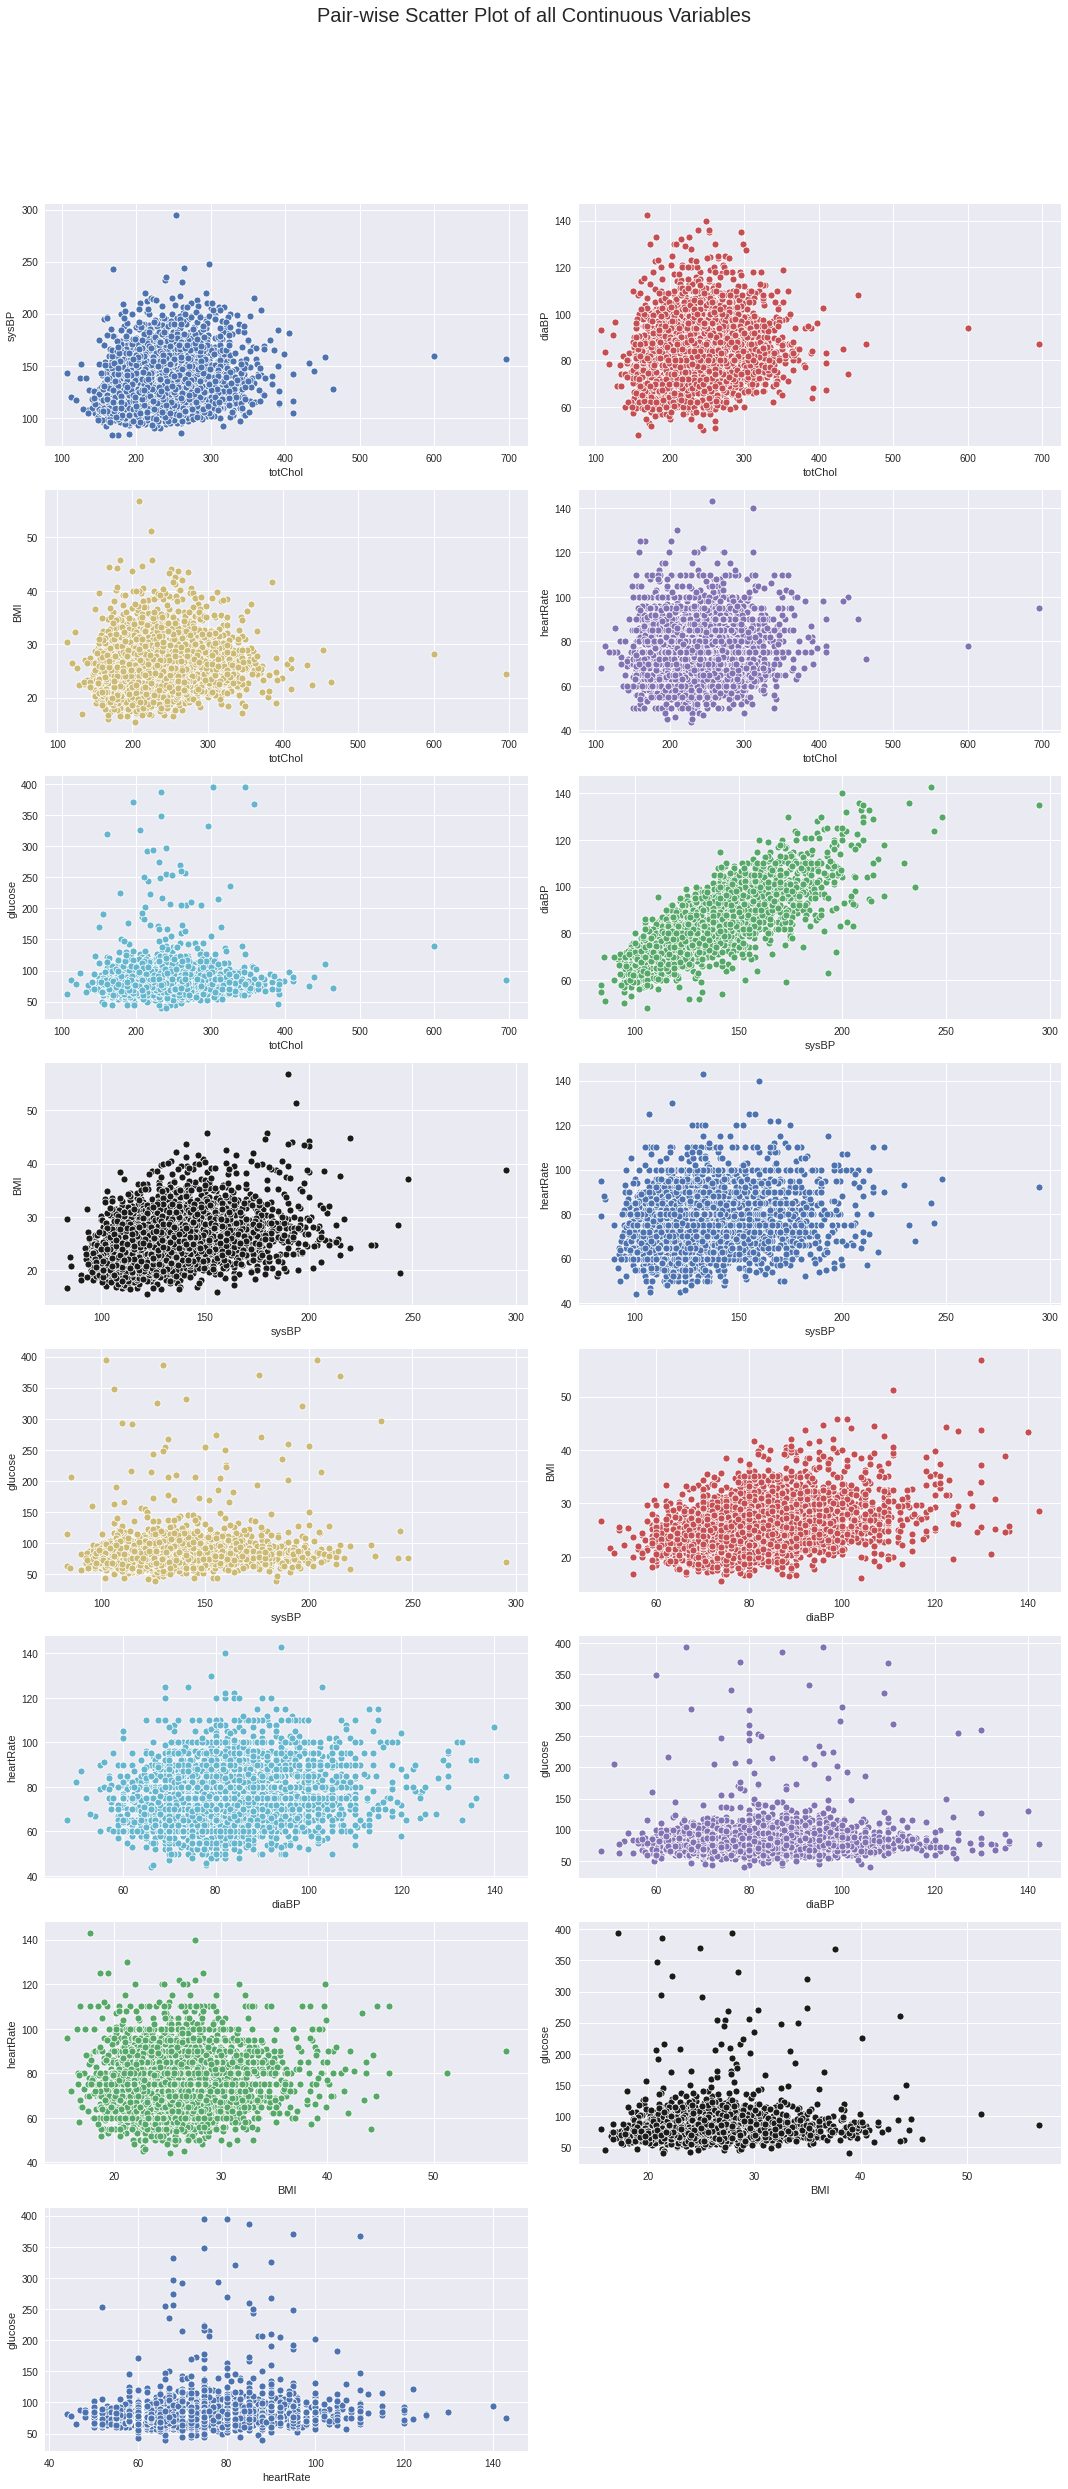

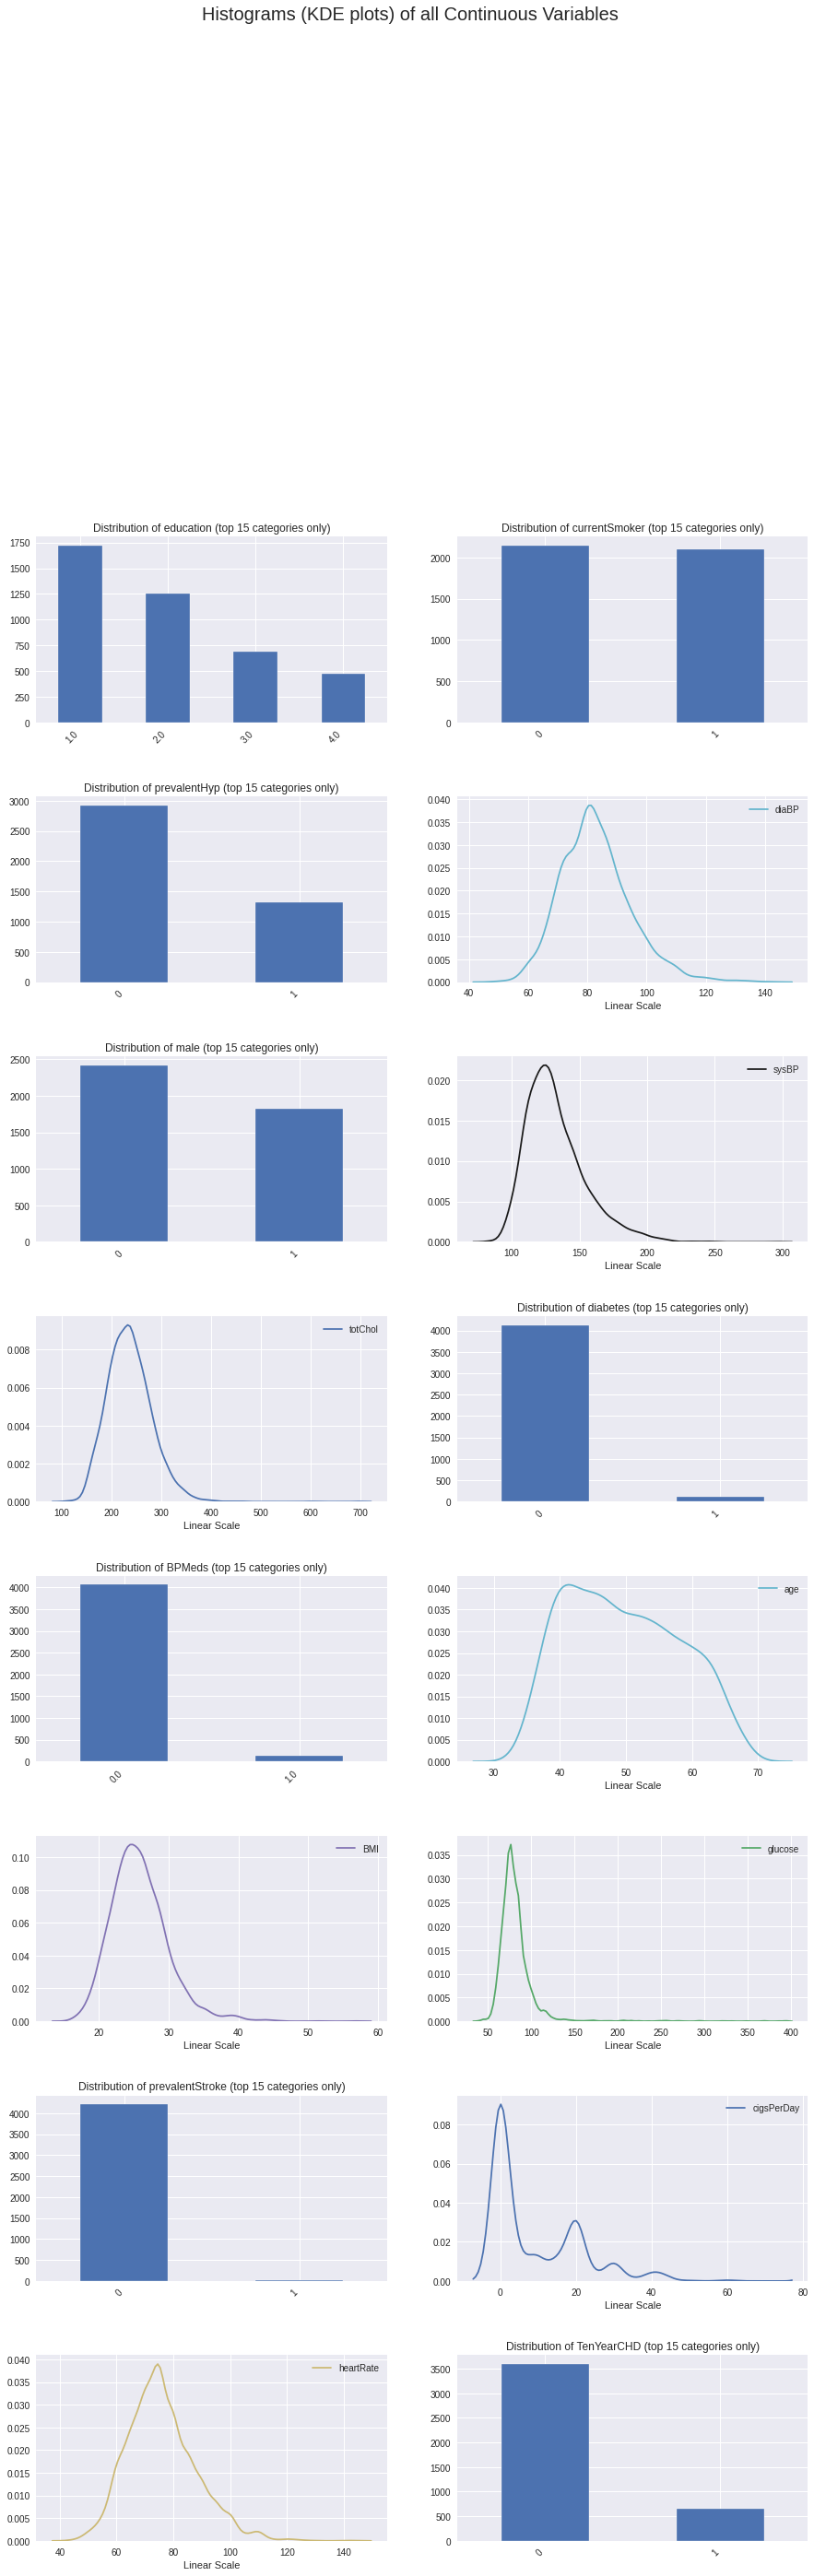

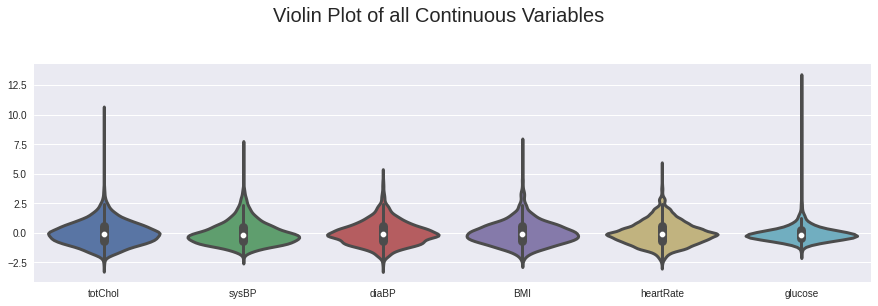

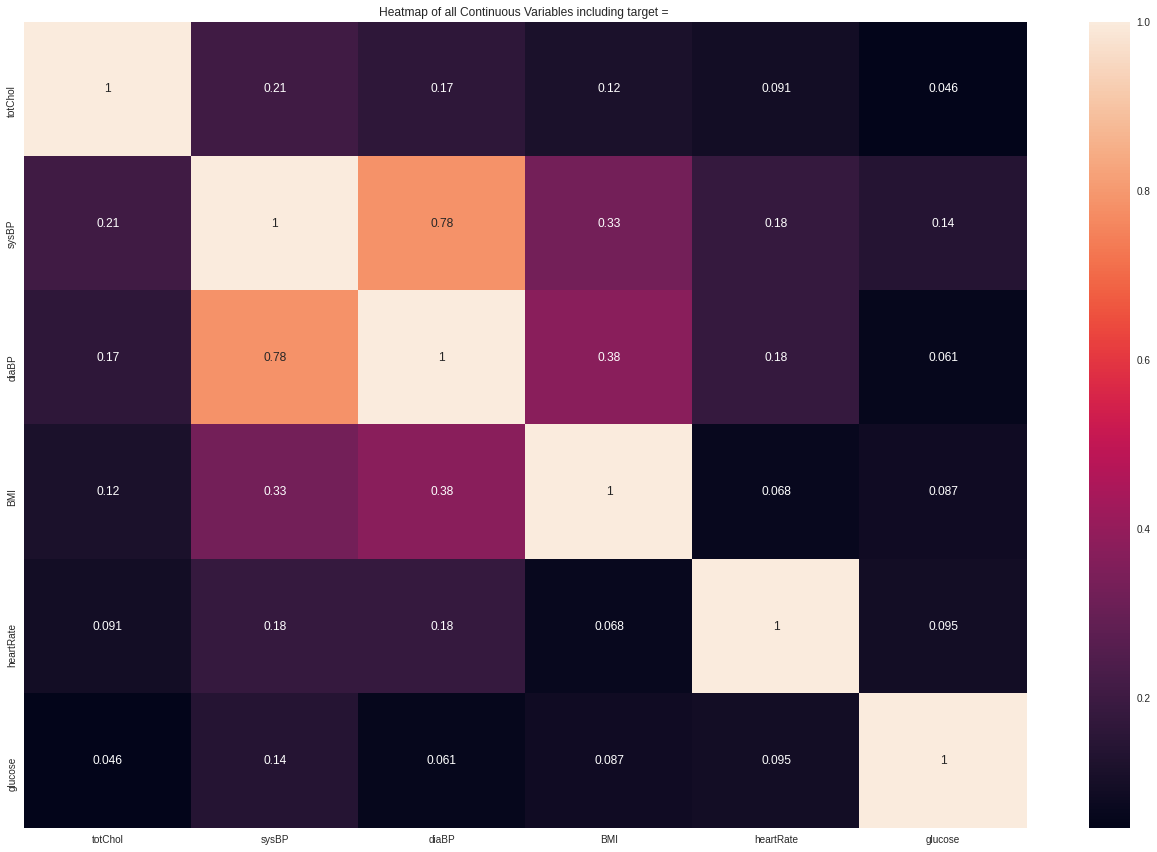

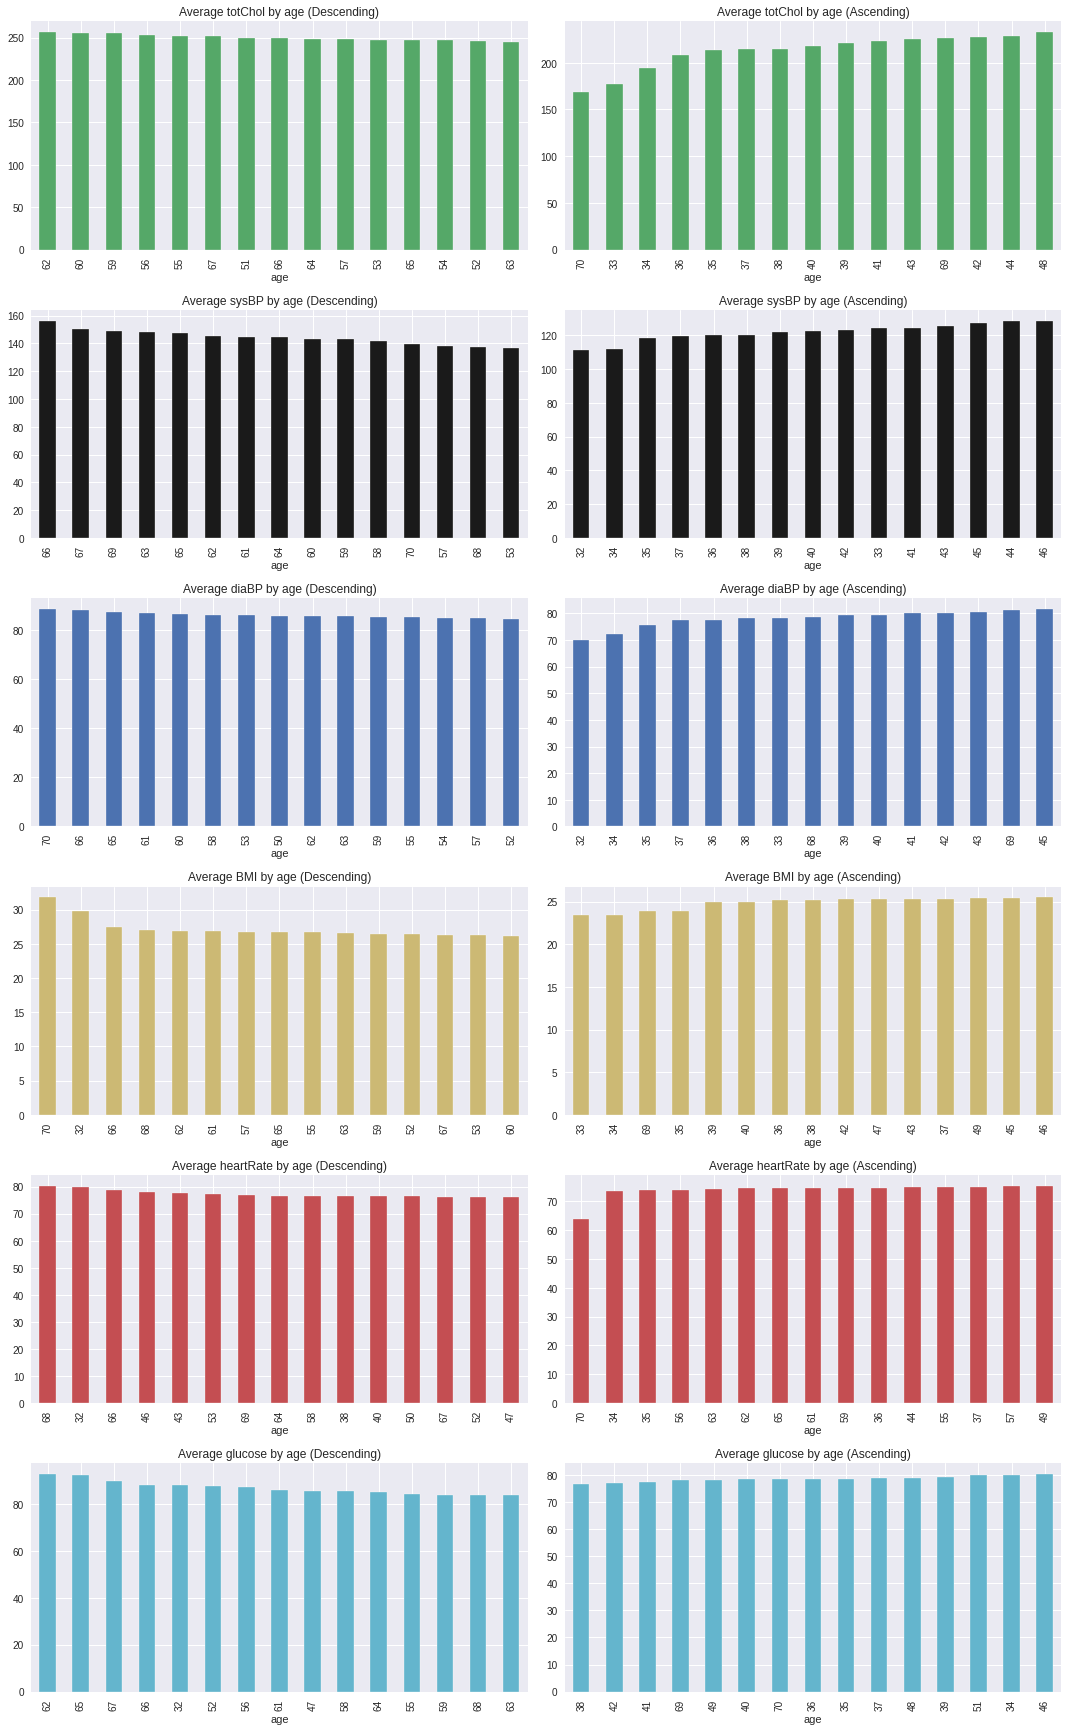

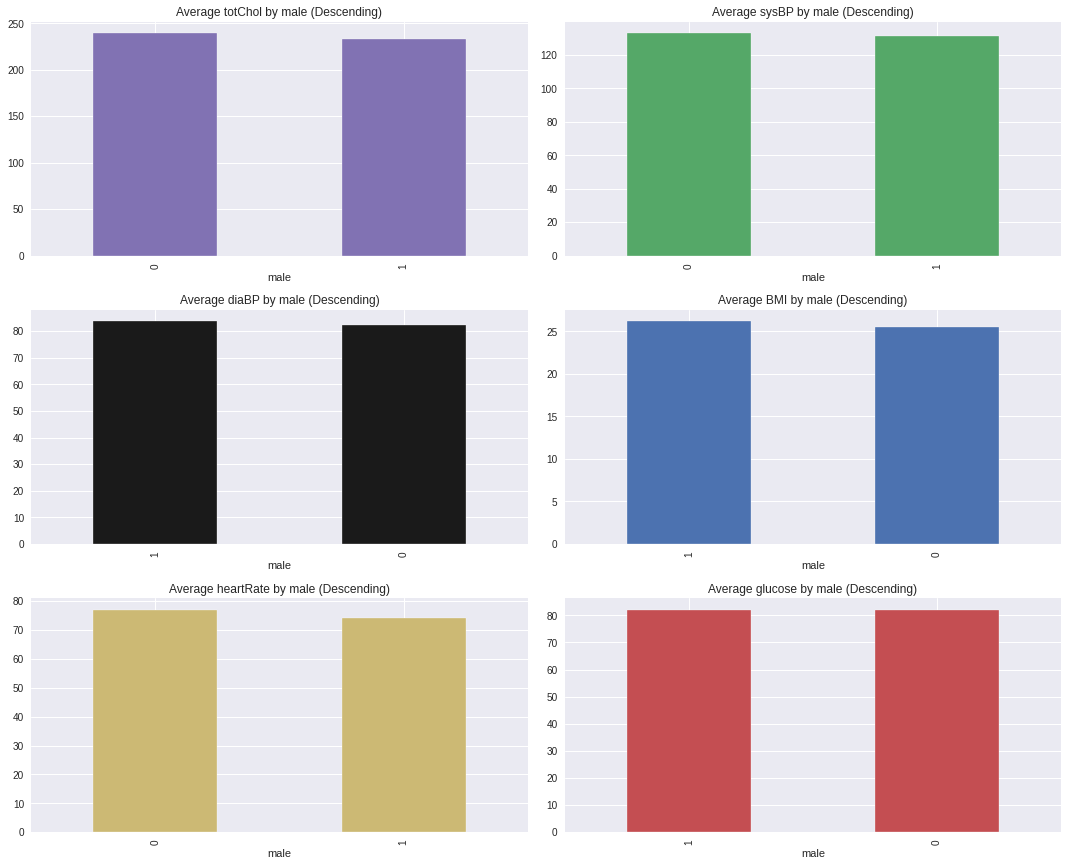

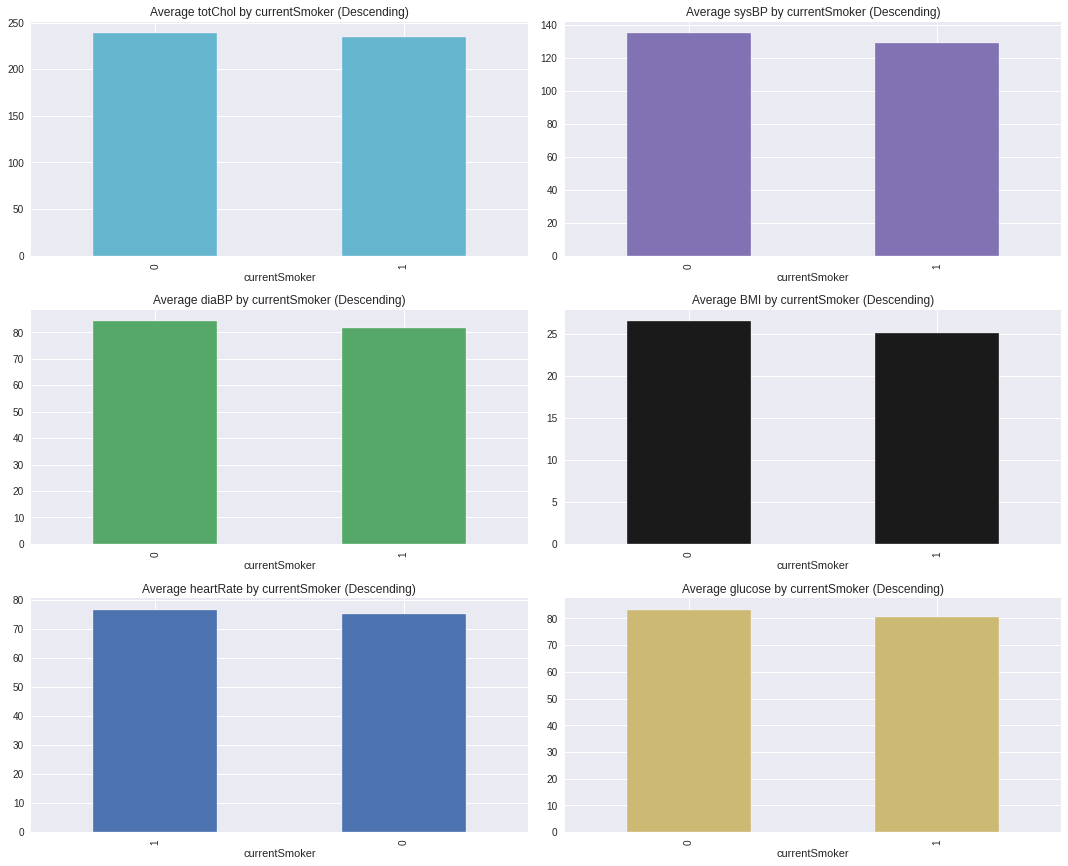

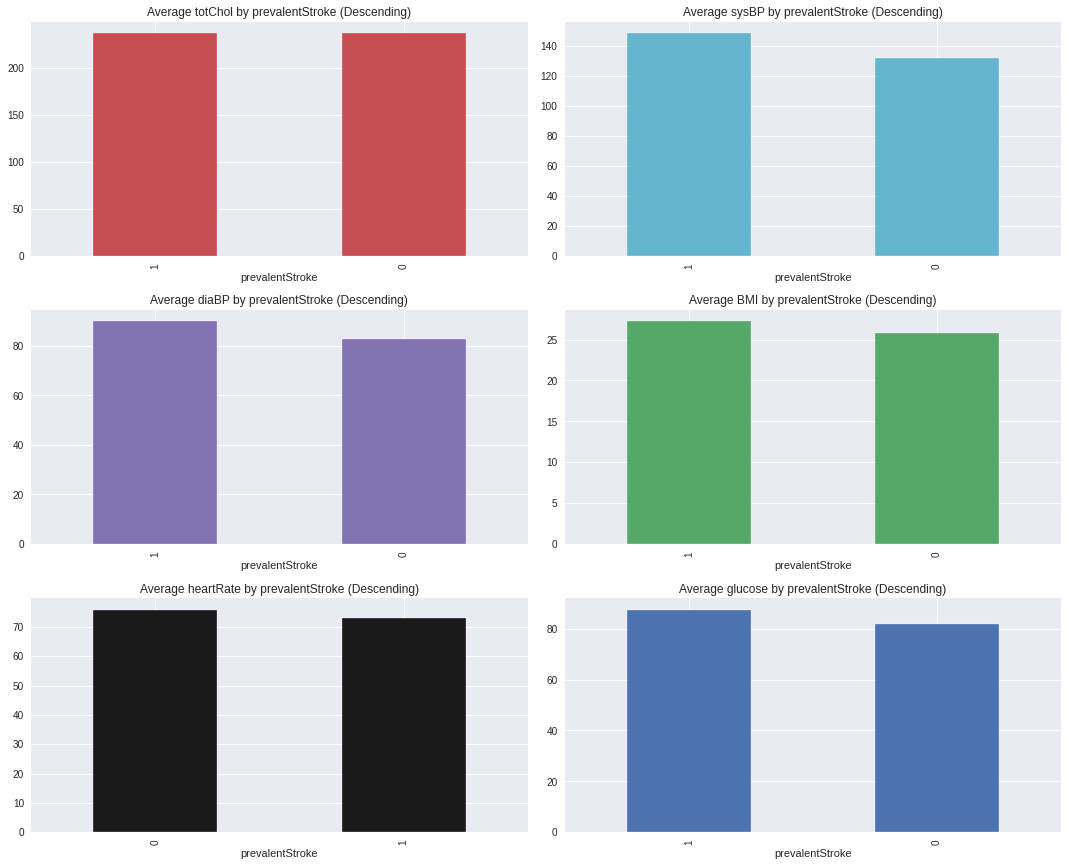

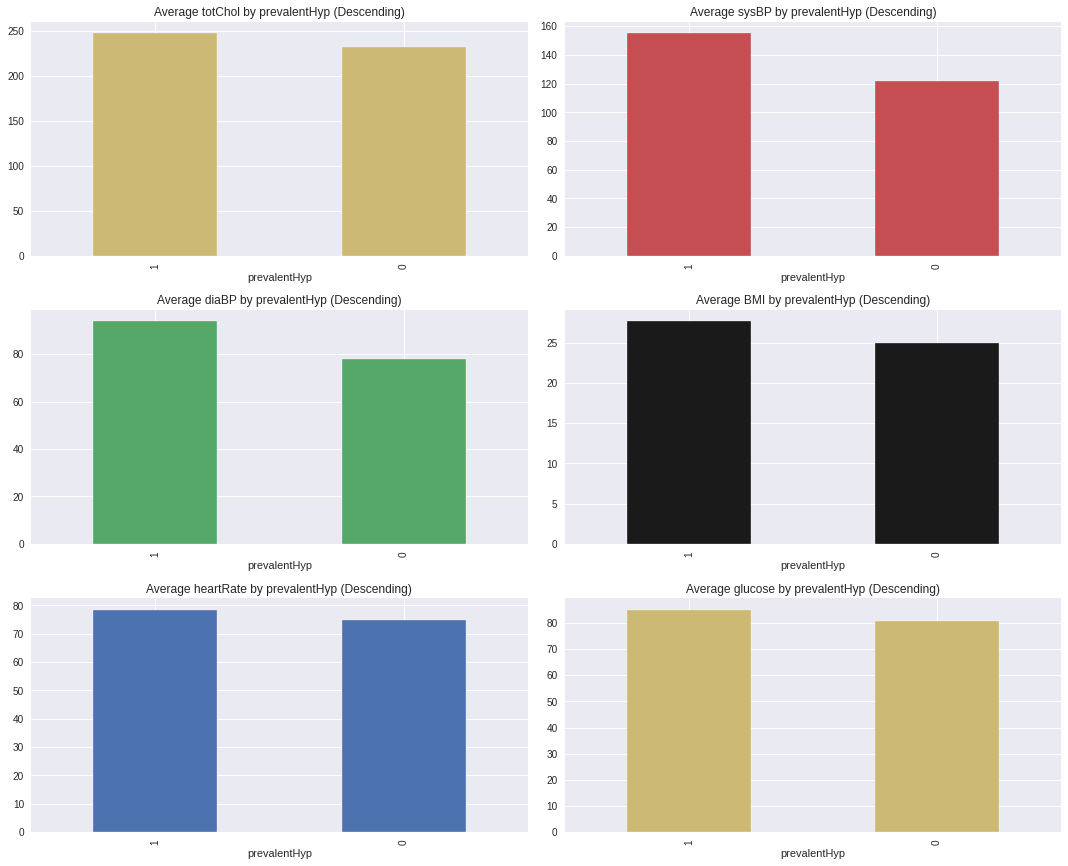

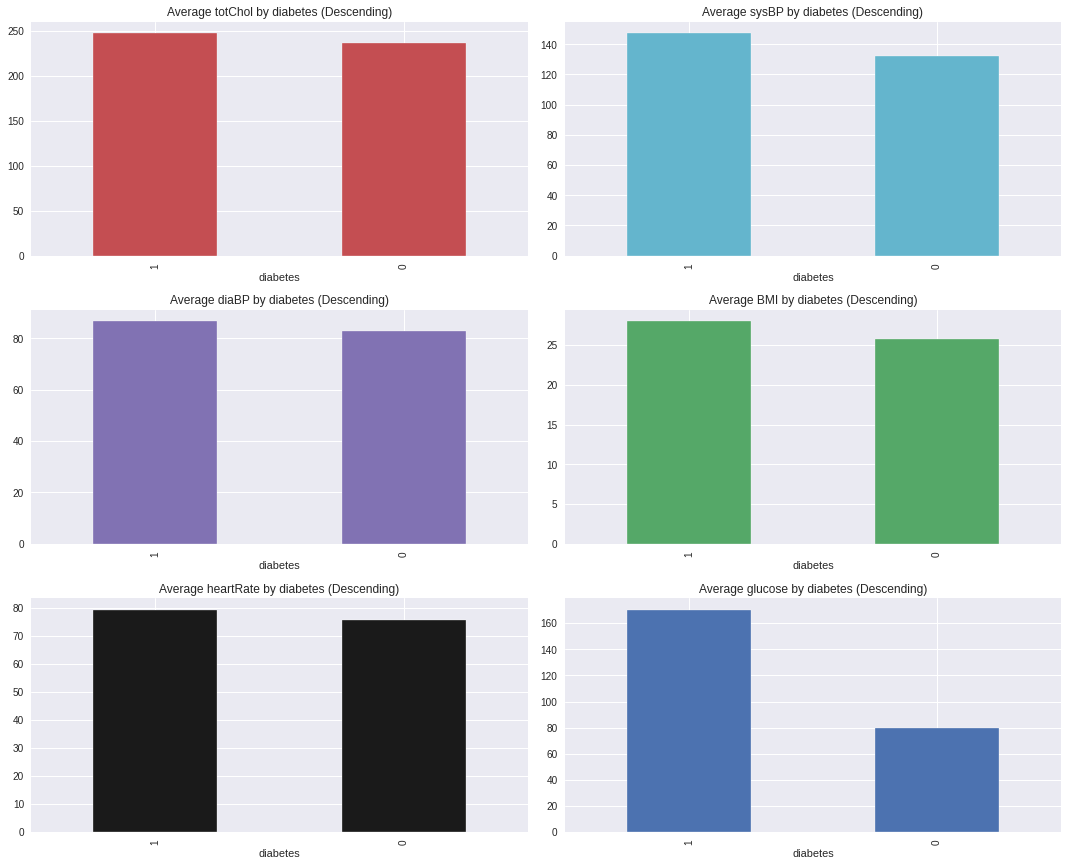

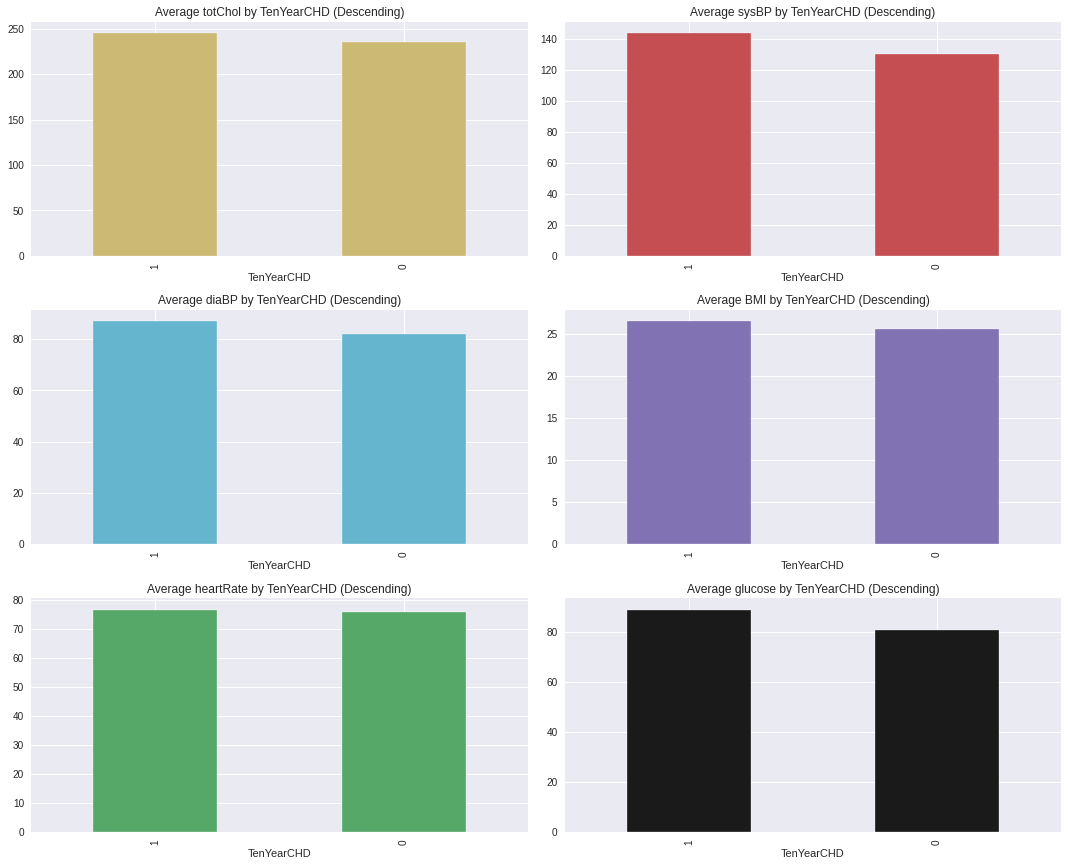

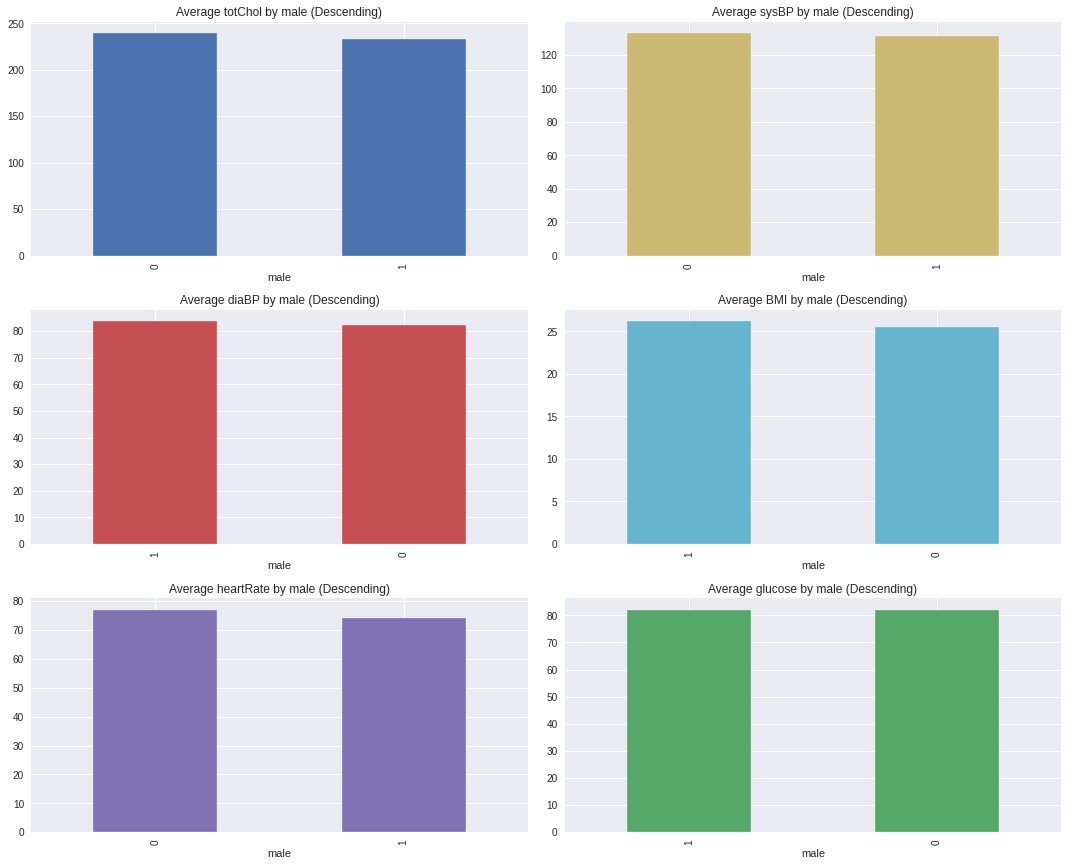

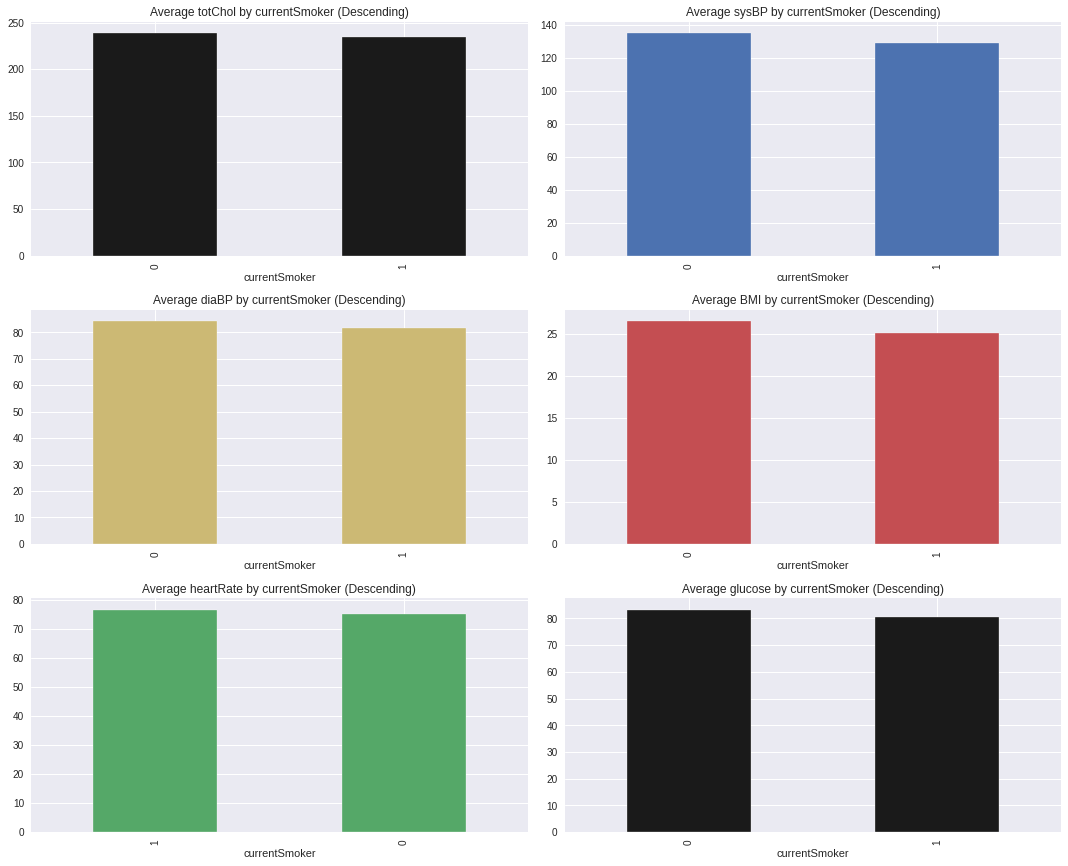

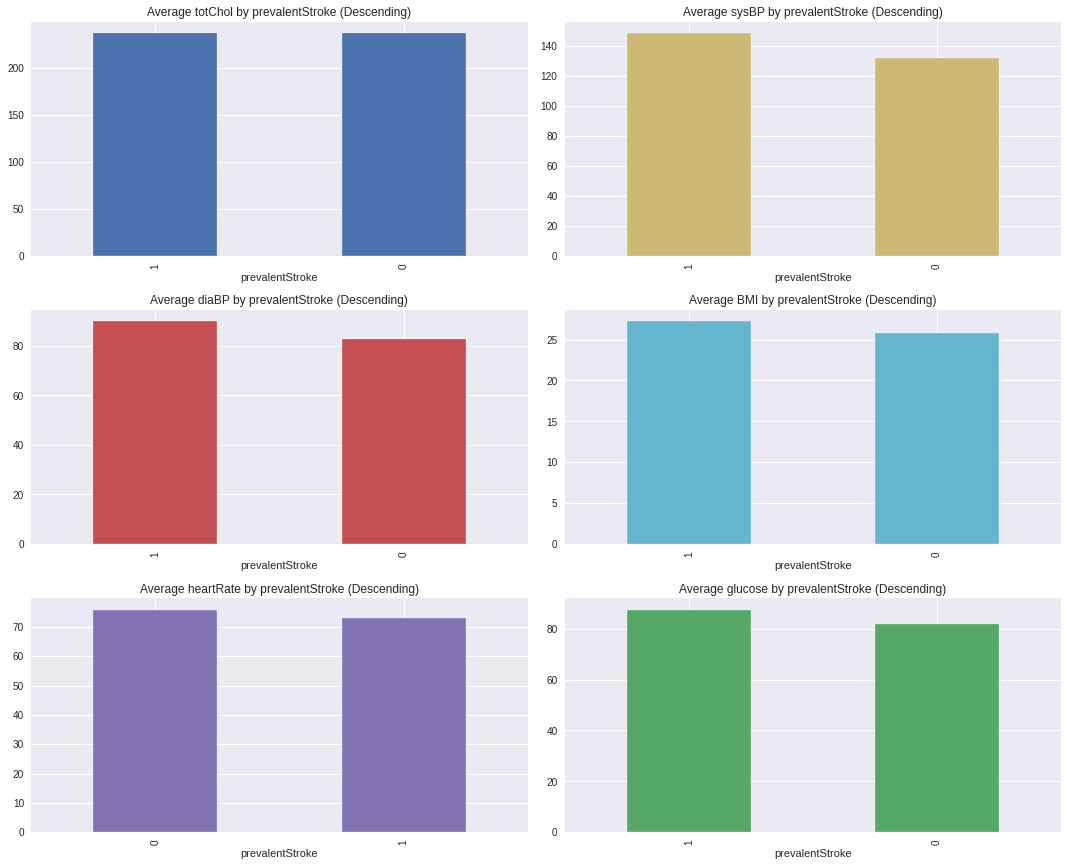

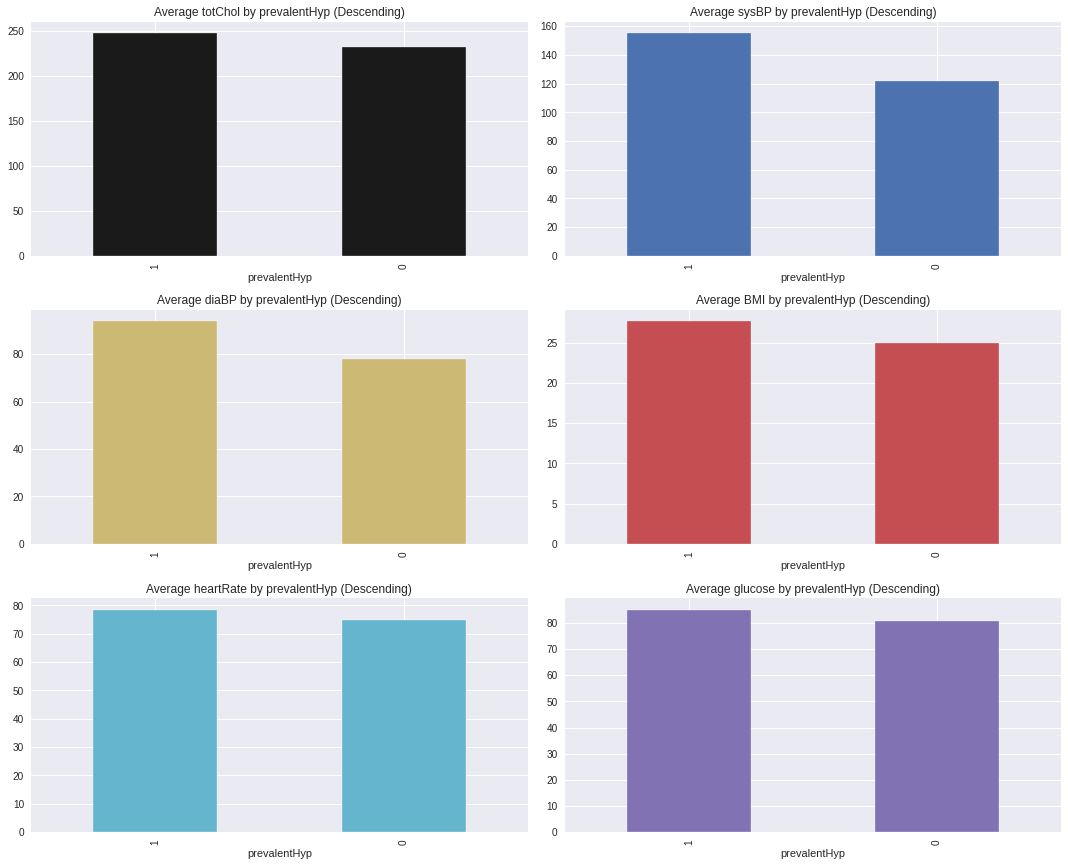

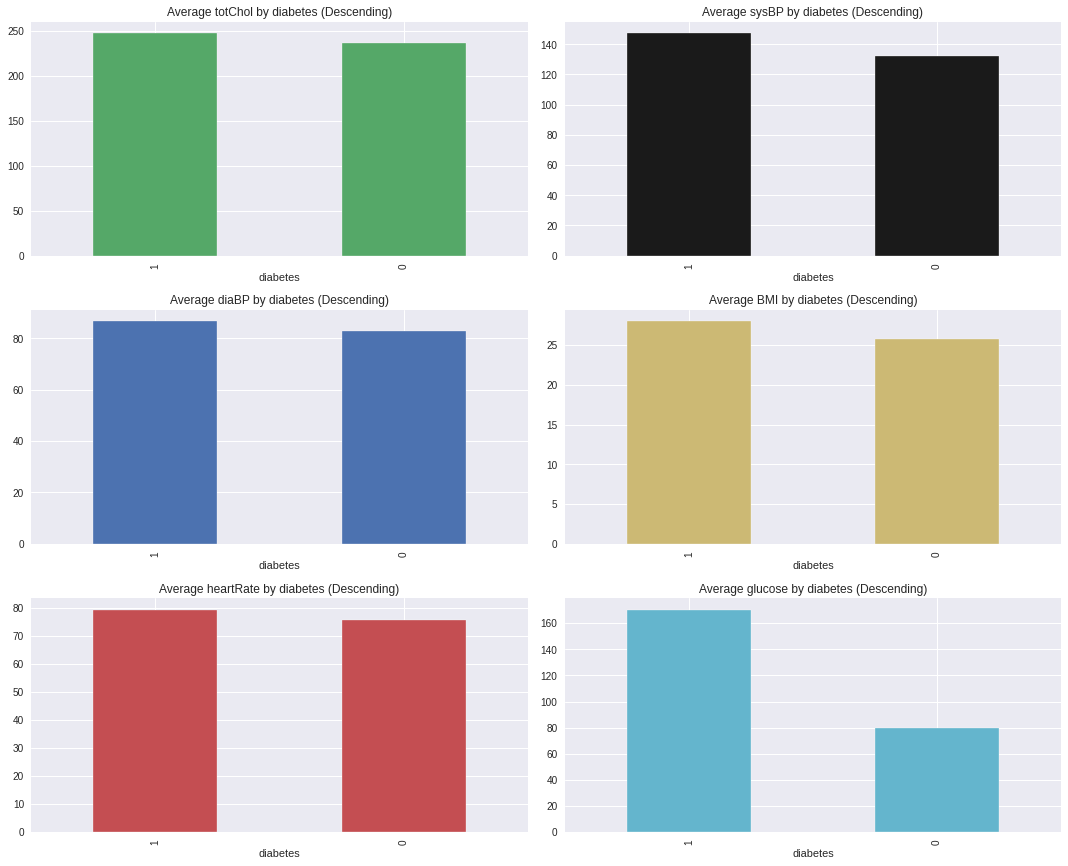

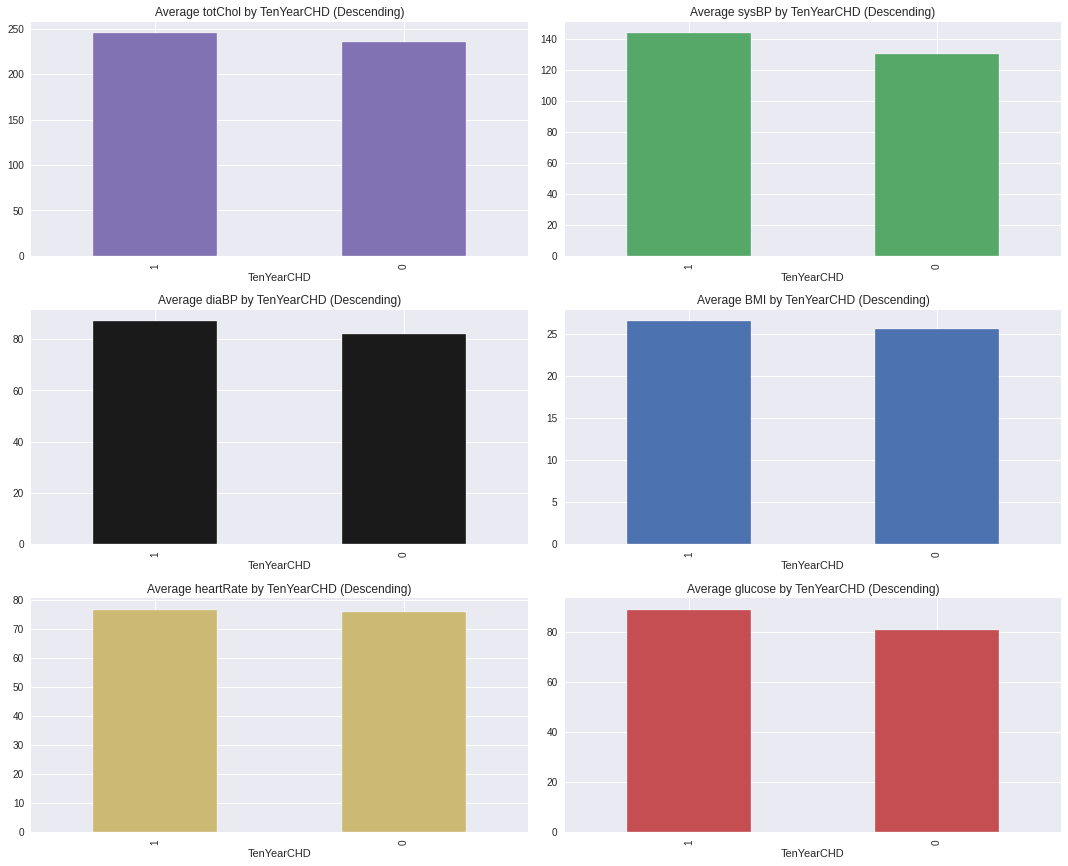

In [22]:
# Let's now visualize the plots generated by AutoViz.
report_2 = AV.AutoViz('../input/logistic-regression-heart-disease-prediction/framingham_heart_disease.csv')

In [23]:
# showing how many coumns have null values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [24]:
# Assigning mean value of the column data to all null values
mean_cigs_per_day = round(data['cigsPerDay'].mean())
mean_BPMeds= round(data['BPMeds']).mean()
mean_totChol = round(data['totChol']).mean()
mean_BMI = round(data['BMI']).mean()
mean_glucose =round(data['glucose']).mean()
data1 =data
data1['cigsPerDay'].fillna(mean_cigs_per_day,inplace= True)
data1['BPMeds'].fillna(mean_BPMeds,inplace = True)
data1['totChol'].fillna(mean_totChol,inplace =True)
data1['BMI'].fillna(mean_BMI, inplace = True)
data1['glucose'].fillna(mean_glucose, inplace =True)
data1 =data1.fillna(0)
print(data1.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [25]:
##Defining training and test data and predicting with logistic regression function
X = data1[['male','age','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','BMI','totChol','sysBP','glucose']]
y = data1['TenYearCHD']
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3,random_state =1)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred =model.predict(X_test)
#printing logistic regression equation 
print('Logistic Regression equation, {} + {}'.format(model.coef_ , model.intercept_))


Logistic Regression equation, [[ 0.56376423  0.03109661  0.01132737  0.52327451  0.17248163  1.40974057
   0.68322447 -0.05699116 -0.00293983 -0.00679461  0.00266473]] + [-1.31005567]


In [26]:
print('accuracy score is {:4f}'.format(accuracy_score(y_test,y_pred)))
print('Precision score: ', precision_score(y_test, y_pred,average='micro'))
print('Recall score: ', recall_score(y_test, y_pred,average='micro'))
#checking AUC under ROC curve
y_score = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

accuracy score is 0.867138
Precision score:  0.8671383647798742
Recall score:  0.8671383647798742
roc_auc_score for Logistic Regression:  0.6738599969498246


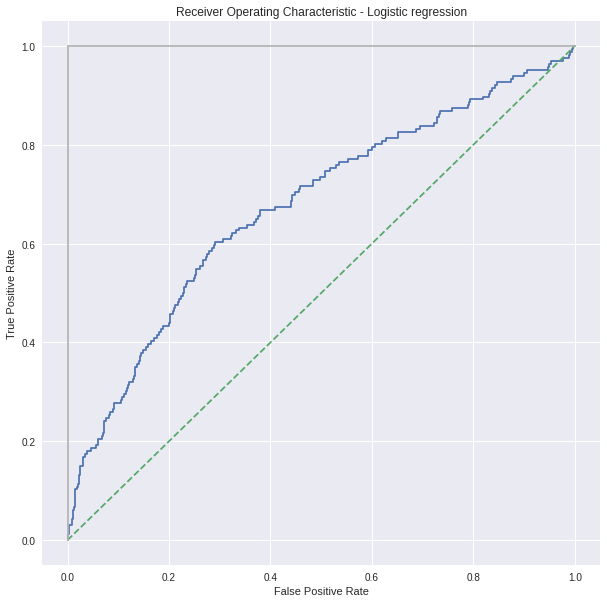

In [27]:
# Plotting ROC Curve
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()